In [438]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import missingno as msno
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [439]:
def get_data():
  df = pd.read_csv('https://raw.githubusercontent.com/MerienMoelker/Shark-attack---assignment/de7abb6d91e705a3875bb3d617a05ee774b11108/attacks.csv',  encoding='cp1252')
  #df.loc[df['Case Number'] == '0', 'Case Number'] = np.nan
  df['Case Number'].replace({'0': np.nan, 'xx': np.nan}, inplace=True)
  df.dropna(subset=['Case Number'], inplace=True)
  df.drop(columns=[ 'pdf', 'href formula', 'href','Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'], inplace=True)
  df.rename(columns={'Type':'Provoked'}, inplace=True)
  return df

1. what are the most dangerous types of sharks to humans?

so i need to clean up the species and fatal  columns.
after that i will make a horizontal bargraph for the number of attacks for the top 5 and for the most fatal attacks i will make a graph 

In [440]:
df = get_data()

In [441]:
df['Species '] = df['Species '].replace({np.nan:' ', None:' '})

weird_carectars = ['"', "'", '[', ']', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '-', '_', '.', '+', ',','(' , ')', '?']
def remove_weird_caracters(string):
  for car in weird_carectars:
    if car in string:
      count = string.count(car)
      for i in range(0, count):
        place = string.find(car)
        string = string.replace(string[place], '')       
  return string

def find_species(string):
  if 'shark' in string:
    shark = string.find('shark')
    string = string[0:shark+len('shark')]
    cut_place = string.count(' ') - 1
    place = -1
    for i in range(0, cut_place):
      place = string.find(' ', place+1)
    string = string[place +1:shark+len('shark')]
    if ' ' not in string:
      slice_point =string.find('shark')
      first = string[0:slice_point]
      second = string[slice_point:]
      string = f'{first} {second}'
  return string 

not_a_shark = ['shark', ' shark', 'm shark', ' ']
def remove_not_a_shark(string):       
  if 'shark' not in string:
    string = None
  if string in not_a_shark:
    string = None
  return string

def find_shark_species(string):
  string = string.lower()
  string =  remove_weird_caracters(string)
  string = find_species(string)
  string = remove_not_a_shark(string)
  return string

#df['Species '] = df['Species '].str.lower()
#df['Species '] = df['Species '].transform(remove_weird_caracters)
#df['Species '] = df['Species '].transform(find_species)
#df['Species '] = df['Species '].transform(remove_not_a_shark)
df['Species '] = df['Species '].transform(find_shark_species)


#fatal
#display(df['Fatal (Y/N)'].unique())
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].replace({'N':False, 'Y':True, np.nan:False,'M':False, 'UNKNOWN':False, '2017':False, ' N':False, 'N ':False, 'y':True})

In [442]:
shark_atacks = df['Species '].value_counts().rename_axis('Species ').reset_index(name='counts')

def nr_fatal_incedents(row):
  filter = df[df['Species '] == row['Species ']]
  return  filter['Fatal (Y/N)'].sum()

shark_atacks['nr_fatal_incedents'] = shark_atacks.apply(nr_fatal_incedents, axis=1)

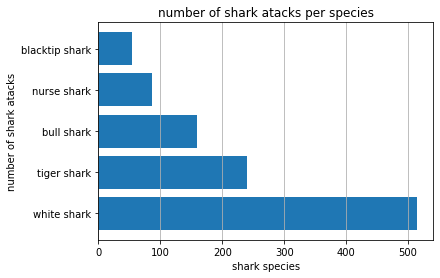

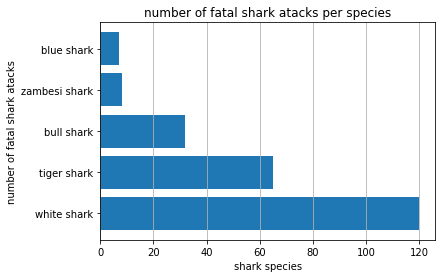

In [443]:
fig, ax1 = plt.subplots()

x1 = shark_atacks.loc[0:4, 'Species ']
y1 = shark_atacks.loc[0:4, 'counts']


ax1.barh(x1,y1)
ax1.set(xlabel='shark species', ylabel='number of shark atacks', title='number of shark atacks per species')
ax1.grid(axis='x')
fig, ax2 = plt.subplots()

x2 = shark_atacks.sort_values(by=['nr_fatal_incedents'], ascending=False).iloc[0:5]['Species ']
y2 = shark_atacks.sort_values(by=['nr_fatal_incedents'], ascending=False).iloc[0:5]['nr_fatal_incedents']

ax2.barh(x2,y2)
ax2.set(xlabel='shark species', ylabel='number of fatal shark atacks', title='number of fatal shark atacks per species')
ax2.grid(axis='x')

as you can see the most dangeous sharks are the white shark, tiger shark and the bull shark. beacous thay have the most atacks and fatal atacks. for these graphs i did not concider the human influece and the number of sharks that come into contact with humans. and the population of a shark species.

2. are children more likely to be attacked by sharks?

i will clean up the Age column and make a graph that shows the age that gets atacked the most

In [444]:
df = get_data()
ages = []
def convert_age(age):
  try:
    age = float(age)
  except:
    if age not in ages:
      ages.append(age)
  return age

df['Age'] = df['Age'].transform({'Age':convert_age})

print(ages)


['40s', '20s', 'Teen', '60s', '18 months', '30s', '50s', 'teen', '28 & 26', '18 or 20', '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26', '8 or 10', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '33 or 37', 'mid-30s', '23 & 20', '7      &    31', '20?', "60's", '32 & 30', '16 to 18', 'Elderly', 'mid-20s', 'Ca. 33', '21 or 26', '>50', '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35', '23 & 26', '(adult)', '33 & 37', '25 or 28', '37, 67, 35, 27,  ? & 27', '21, 34,24 & 35', '30 & 32', '50 & 30', '17 & 35', 'X', '"middle-age"', '13 or 18', '34 & 19', '33 & 26', '2 to 3 months', 'MAKE LINE GREEN', '"young"', '7 or 8', '17 & 16', 'F', 'Both 11', '9 or 10', 'young', '36 & 23', '  ', 'A.M.', '?    &   14', '10 or 12', '31 or 33', '2½', '13 or 14']


In [445]:
df['Age'] = df['Age'].replace({'40s':45, '20s':25, 'Teen':15, '60s':65, '18 months':2, '30s':35, '50s':55, 'teen':15, '28 & 26':27, '18 or 20':19, 
                               '12 or 13':12, '46 & 34':46, '28, 23 & 30':28, 'Teens':15, '36 & 26':31, '8 or 10':9, '\xa0 ':np.nan, ' ':np.nan, '30 or 36':33, '6½':6, '21 & ?':21, 
                               '33 or 37':35, 'mid-30s':35, '23 & 20':23, '7      &    31':7, '20?':20, "60's":65, '32 & 30':31, '16 to 18':17, 'Elderly':75, 
                               'mid-20s':25, 'Ca. 33':33, '21 or 26':23, '>50':55, '18 to 22':20, 'adult':40, '9 & 12':9, '? & 19':19, '9 months':1, '25 to 35':30, 
                               '23 & 26':23, '(adult)':40, '33 & 37':33, '25 or 28':26, '37, 67, 35, 27,  ? & 27':35, '21, 34,24 & 35':30, '30 & 32':30, '50 & 30':40, '17 & 35':17, 'X':np.nan, '"middle-age"':37, 
                               '13 or 18':15, '34 & 19':34, '33 & 26':33, '2 to 3 months':1, 'MAKE LINE GREEN':np.nan, '"young"':10, '7 or 8':7, '17 & 16':17, 'F':np.nan, 'Both 11':11, '9 or 10':9, 'young':10, 
                               '36 & 23':33, '  ':np.nan, 'A.M.':np.nan, '?    &   14':14, '10 or 12':11, '31 or 33':32, '2½':2, '13 or 14':13, None:np.nan})
df = df.astype({'Age':'float'})

In [446]:
attacks_per_age = df['Age'].value_counts().rename_axis('Age').reset_index(name='counts').sort_values(by=['Age'])
attacks_per_age.sort_values

<bound method DataFrame.sort_values of      Age  counts
65   1.0       4
73   2.0       2
63   3.0       5
60   5.0       7
50   6.0      15
..   ...     ...
79  81.0       1
80  82.0       1
75  84.0       1
74  86.0       1
76  87.0       1

[81 rows x 2 columns]>

[Text(0, 0.5, 'number of shark atacks'),
 Text(0.5, 0, 'age'),
 Text(0.5, 1.0, 'attacks per age')]

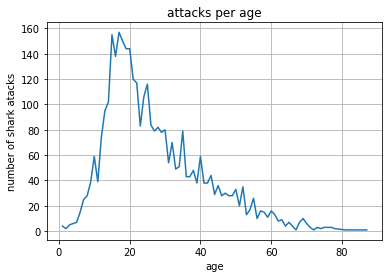

In [447]:
fig, ax = plt.subplots()

x = attacks_per_age.loc[:,'Age']
y = attacks_per_age.loc[:,'counts']


ax.plot(x,y)
ax.grid()
ax.set(xlabel='age', ylabel='number of shark atacks', title='attacks per age')

teeagers are more likly to be atacked by sharks

3. are shark attacks where sharks were provoked more or less dangerous?

i will clean yp the provoked column and make it True or False. Then i will look at what percentage of attacks was fatal.

In [448]:
df = get_data()
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].replace({'N':False, 'Y':True, np.nan:False,'M':False, 'UNKNOWN':False, '2017':False, ' N':False, 'N ':False, 'y':True})
display(df['Provoked'].unique())
display(df['Provoked'].value_counts())

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

Unprovoked      4595
Provoked         573
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Provoked, dtype: int64

In [449]:
provoked_attacks = df['Provoked'].value_counts().rename_axis('Provoked').reset_index(name='counts')

def nr_fatal_incedents(row):
  filter = df[df['Provoked'] == row['Provoked']]
  return  (filter['Fatal (Y/N)'].sum() / row['counts']) * 100

provoked_attacks['percentage_fatal'] = provoked_attacks.apply(nr_fatal_incedents, axis=1)

In [450]:
df['Provoked'] = df['Provoked'].replace({'Boating':False, 'Unprovoked':False, 'Invalid':False, 'Questionable':False,
       'Sea Disaster':False, np.nan:False, 'Boat':False, 'Boatomg':False, None:False, 'Provoked':True})

In [451]:
provoked_attacks = df['Provoked'].value_counts().rename_axis('Provoked').reset_index(name='counts')

def nr_fatal_incedents(row):
  filter = df[df['Provoked'] == row['Provoked']]
  return  (filter['Fatal (Y/N)'].sum() / row['counts']) * 100

provoked_attacks['percentage_fatal'] = provoked_attacks.apply(nr_fatal_incedents, axis=1)

In [452]:
unprovoked = provoked_attacks.loc[0, 'percentage_fatal']
provoked = provoked_attacks.loc[1, 'percentage_fatal']
print(f'the percentage of fatal unprovoked attacks is: {unprovoked}\nthe percentage of fatal provoked attacks is: {provoked}')

the percentage of fatal unprovoked attacks is: 23.917597765363126
the percentage of fatal provoked attacks is: 3.315881326352531


so provoked attacks are less dangerous

4. are certain activities more likely to result in a shark attack?

i need to clean up the activity column and then show with what activity you are most likely to be attacked

In [453]:
df = get_data()
df['Activity'] = df['Activity'].replace(np.nan, None)
df['Activity'] = df['Activity'].replace('.', None)

activities = []
def select_activities(column):
  for act in column.unique().tolist():
    if ' ' not in act:
      activities.append(act)

def transform_activities(activity):
  for act in activities:
    if act in activity:
      activity = act
  return activity
      
select_activities(df['Activity'])
df['Activity'] = df['Activity'].transform(transform_activities)

In [454]:
activities_count = df['Activity'].value_counts(dropna=False).rename_axis('Activity').reset_index(name='counts')

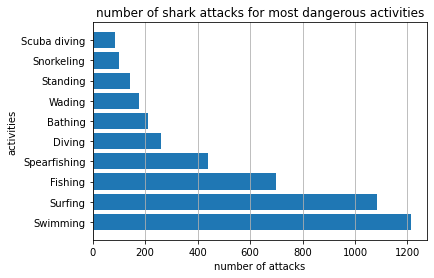

In [455]:
fig, ax = plt.subplots()

x = activities_count.loc[0:9, 'Activity']
y = activities_count.loc[0:9, 'counts']

ax.barh(x,y)
ax.set(xlabel='number of attacks', ylabel='activities', title='number of shark attacks for most dangerous activities')
ax.grid(axis='x')


as you can see the most attacks are on peaple who are swimming or surfing